<a href="https://colab.research.google.com/github/Tienspkt/BaiTapAi_04/blob/main/Baitap_tuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=3aec3a645e63ef43bcfb6421d1ac9d94c71180b3dc7b35363c4aa7920e78eb5e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-32-0c2292aa59c2>:55: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-32-0c2292aa59c2>:56: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-32-0c2292aa59c2>:57: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


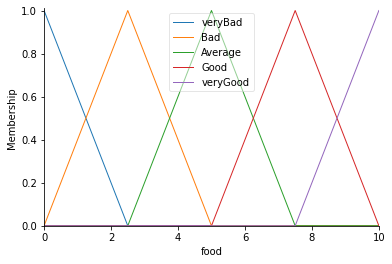

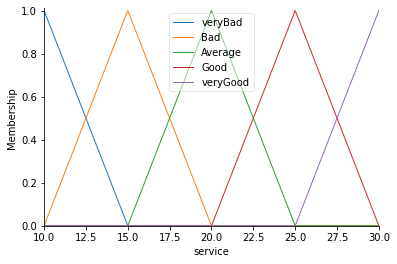

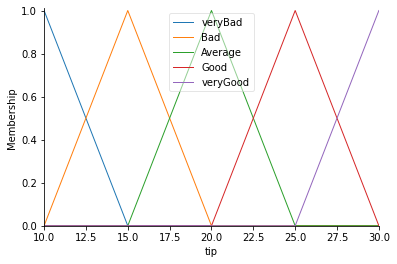

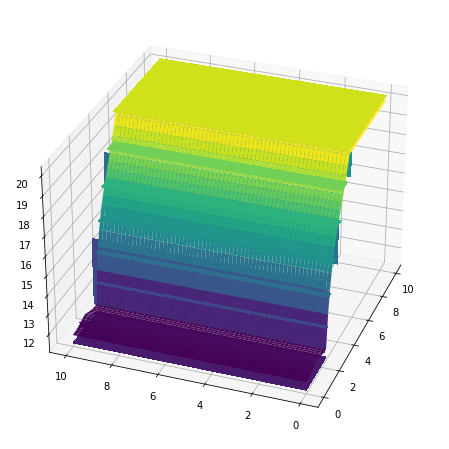

In [32]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

food = np.linspace(0,10,61) # chia khoang 0-10 thanhf 61 phaanf thuw
service = np.linspace(10,30,61)
tip = np.linspace(10,30,61)

food = ctrl.Antecedent(food,'food')
service = ctrl.Antecedent(service,'service')
tip = ctrl.Consequent(tip,'tip')

names = ['veryBad','Bad','Average','Good','veryGood'] # gia tri phai laf ler 
food.automf(names=names) # chia khoan cho tung bieeur ddofo teen dg bieu do
service.automf(names=names)
tip.automf(names=names)

food.view()
service.view()
tip.view() #cho hieenr thij 

#lamf luataj 
rule0 = ctrl.Rule(antecedent = ((food['veryBad']&service['veryBad']))|(food['Bad']&service['veryBad'])|(food['veryBad']&service['Bad']), consequent = tip['veryBad'], label = 'rule veryBad')
rule1 = ctrl.Rule(antecedent = ((food['Average']&service['veryBad']))|(food['Bad']&service['Bad'])|(food['veryBad']&service['Average'])|
                  ((food['Good']&service['veryBad']))|(food['Average']&service['Bad'])|(food['Bad']&service['Average'])|(food['veryBad']&service['Good']), 
                  consequent = tip['Average'], label = 'rule Bad')
rule2 = ctrl.Rule(antecedent = ((food['veryGood']&service['veryBad']))|(food['Good']&service['Bad'])|(food['Average']&service['Average'])|
                  (food['Bad']&service['Good'])|(food['veryBad']&service['veryGood'])|(food['veryGood']&service['Bad'])|(food['Good']&service['Average'])|(food['Average']&service['Good'])|
                  (food['Bad']&service['veryGood']),
                  consequent = tip['Average'], label = 'rule Average')
rule3 = ctrl.Rule(antecedent = ((food['veryGood']&service['Average']))|(food['Good']&service['Good'])|(food['Average']&service['veryGood'])|
                  ((food['veryGood']&service['Good']))|(food['Good']&service['veryGood']), 
                  consequent = tip['Average'], label = 'rule Good')
rule4 = ctrl.Rule(antecedent = ((food['veryGood']&service['veryGood'])), consequent = tip['veryBad'], label = 'rule veryGood')

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['tip']
#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)
  


